In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = ['Computer Modern Sans']
plt.rcParams['text.latex.preamble'] = '\\usepackage[cm]{sfmath}'
plt.rcParams['font.family'] = 'sans-serif'

In [19]:
data = np.loadtxt("../data/hs_outputs_2.txt", skiprows=1)
nqs_en_x, nqs_en_y, analytical_en_x, analytical_en_y = data[:,0], data[:,1], data[:,2], data[:,3]

In [32]:
# Get minimum energies 
unique_true_energies = np.flip(np.unique(analytical_en_y))
print(unique_true_energies)
ns = np.unique(nqs_en_x)
print(ns)
min_energies = []
for n in ns: 
	energies = []
	for row in data: 
		if row[0] == n: 
			energies.append(row[1])
	print(n, energies)
	min_energies.append(min(energies))
	print(min(energies))

[ -2.15897596  -2.8100957   -3.54688908  -4.31795193  -5.1061495
  -5.90413835  -6.70824674  -7.51643483  -8.32747871  -9.14059953
  -9.95527805 -10.7711548  -11.58797302 -12.40554442]
[ 4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]
4.0 [-0.9241422354631835, -2.0130496501360007, -2.1586810652557067, -2.156292544625326]
-2.1586810652557067
6.0 [-2.5000259971029175, -2.102309154710438, -2.8096113020528284, -2.8149830260694713]
-2.8149830260694713
8.0 [-3.531061614018737, -3.5269602459438025, -3.567640790480559, -2.5816845631465757]
-3.567640790480559
10.0 [-4.31712572406295, -4.283621869600415, -4.311176174506953, -4.307976421536572]
-4.31712572406295
12.0 [-5.030298482720978, -5.073449615099989, -5.048872277497113]
-5.073449615099989
14.0 [-5.80168536248204, -3.6145965084172995]
-5.80168536248204
16.0 [-6.659283300146598, -6.703379102975063]
-6.703379102975063
18.0 [-6.973611402943512, -7.480554227082033]
-7.480554227082033
20.0 [-6.704997408460153, -8.314613210235676]
-8.3146

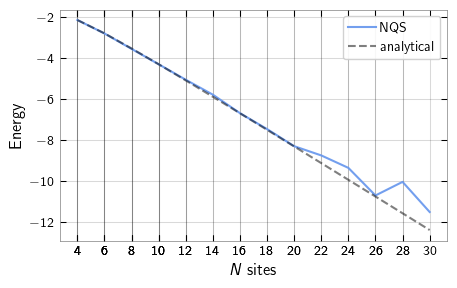

In [34]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(ns, min_energies, label="NQS", color='cornflowerblue', alpha=0.9) 
ax.plot(ns, unique_true_energies, label="analytical", color='black', linestyle='dashed', alpha=0.5) 
ax.set_xticks(nqs_en_x)
ax.set_xlabel('$N$ sites')
ax.set_ylabel('Energy')
plt.legend()
plt.savefig('hs_nqs.pdf')